In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
SHG = pd.read_csv('cleaned_SHG_Data.csv')
SHG.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0


# Booking Patterns:
## a) What is the trend in booking patterns over time, and are there specific seasons or months with increased booking activity?

In [6]:
SHG['Booking Date'] = pd.to_datetime(SHG['Booking Date'])
SHG['Arrival Date'] = pd.to_datetime(SHG['Arrival Date'])
SHG['Status Update'] = pd.to_datetime(SHG['Status Update'])

# Extract Month and year
SHG['Booking Month'] = SHG['Booking Date'].dt.month
SHG['Booking Year'] = SHG['Booking Date'].dt.year
SHG['Month-Year'] = SHG['Booking Date'].dt.to_period('M')

In [7]:
SHG

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss,Booking Month,Booking Year,Month-Year
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0,7,2014,2014-07
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0,6,2013,2013-06
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0,6,2015,2015-06
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0,6,2015,2015-06
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0,6,2015,2015-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,119386,City,2017-08-07,2017-08-30,23,7,2,Offline Travel Agent,Transient,Belgium,No Deposit,96.0,Check-Out,2017-09-06,0,673.0,0.0,8,2017,2017-08
119206,119387,City,2017-05-21,2017-08-31,102,7,3,Online Travel Agent,Transient,France,No Deposit,225.0,Check-Out,2017-09-07,0,1578.0,0.0,5,2017,2017-05
119207,119388,City,2017-07-28,2017-08-31,34,7,2,Online Travel Agent,Transient,Germany,No Deposit,158.0,Check-Out,2017-09-07,0,1104.0,0.0,7,2017,2017-07
119208,119389,City,2017-05-14,2017-08-31,109,7,2,Online Travel Agent,Transient,United Kingdom,No Deposit,104.0,Check-Out,2017-09-07,0,731.0,0.0,5,2017,2017-05


In [10]:
# Group by month-year
booking_trend = SHG.groupby('Month-Year').size().reset_index(name='Booking Count')

In [13]:
print(booking_trend.head(10))

  Month-Year  Booking Count
0    2013-06              1
1    2014-03              1
2    2014-04              4
3    2014-06              2
4    2014-07              3
5    2014-08              5
6    2014-09             18
7    2014-10           2535
8    2014-11             68
9    2015-01           1165


# Convert Month-Year to string
## Before plotting i convert the Month-Year column to string so that seaborn can interpret it correctly

In [15]:
booking_trend['Month-Year'] = booking_trend['Month-Year'].astype(str)

In [17]:
# sort the month-year so it can be order
booking_trend = booking_trend.sort_values('Month-Year')

C:\Users\HP\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


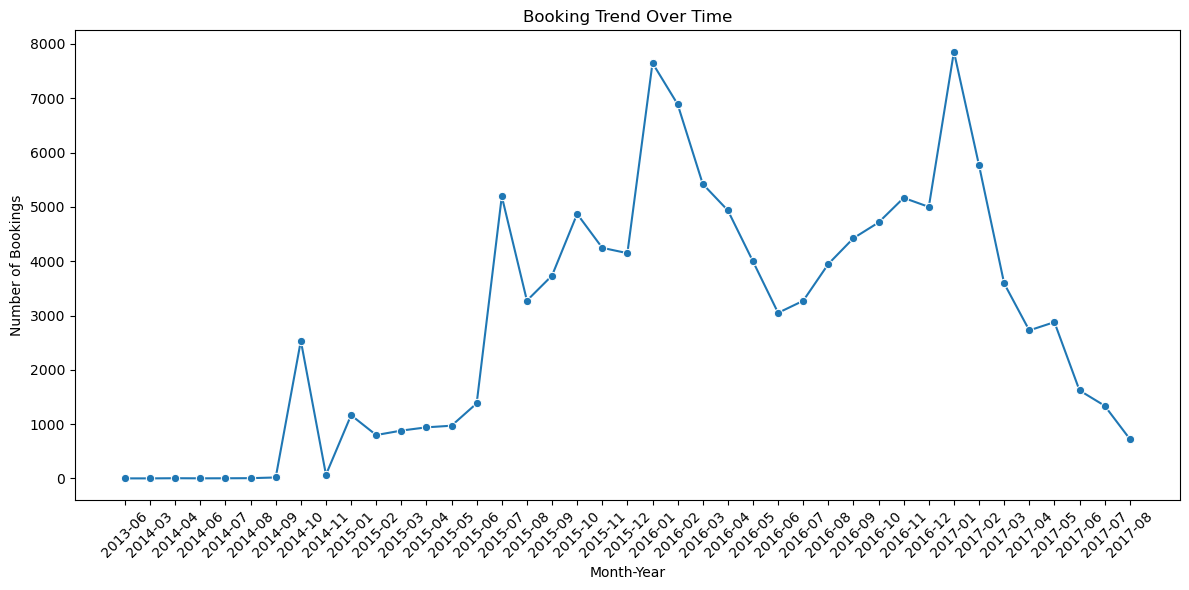

In [18]:
# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=booking_trend, x='Month-Year', y='Booking Count', marker='o')
plt.xticks(rotation=45)
plt.title('Booking Trend Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

In [19]:
# To spot peak months
SHG['Booking Month Name'] = SHG['Booking Date'].dt.month_name()
monthly = SHG.groupby('Booking Month Name').size().sort_values(ascending=False)
print(monthly)

Booking Month Name
January      16672
February     13452
October      12119
March         9894
July          9807
November      9480
December      9148
April         8606
September     8177
August        7956
May           7845
June          6054
dtype: int64


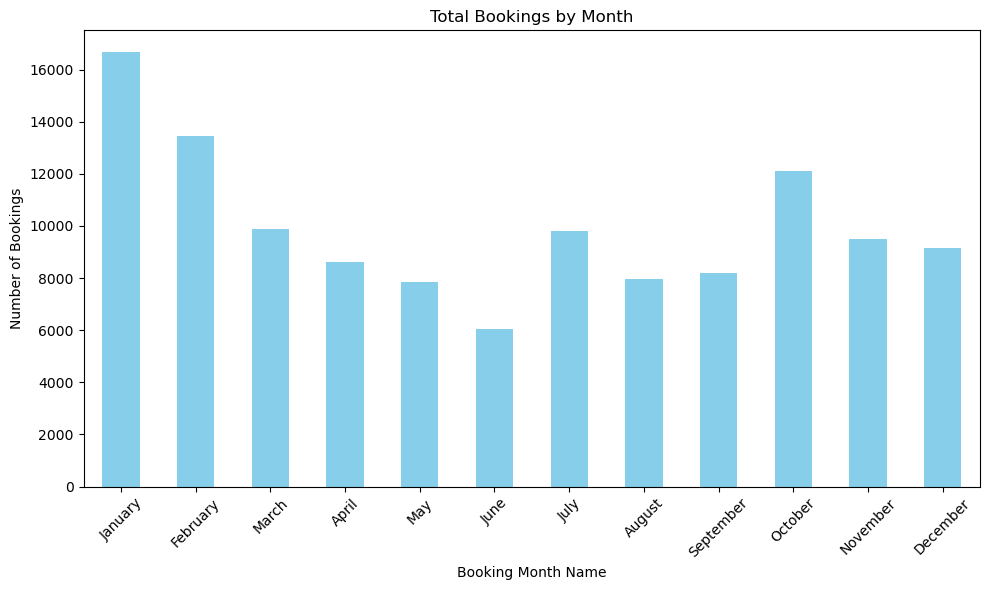

In [20]:
# top booking months as a bar chart
month_summary = SHG['Booking Month Name'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])

month_summary.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Total Bookings by Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# b) How does lead time vary across different booking channels, and is there a correlation between lead time and customer type?

## Lead Time Analysis Across Channels and Customer Types

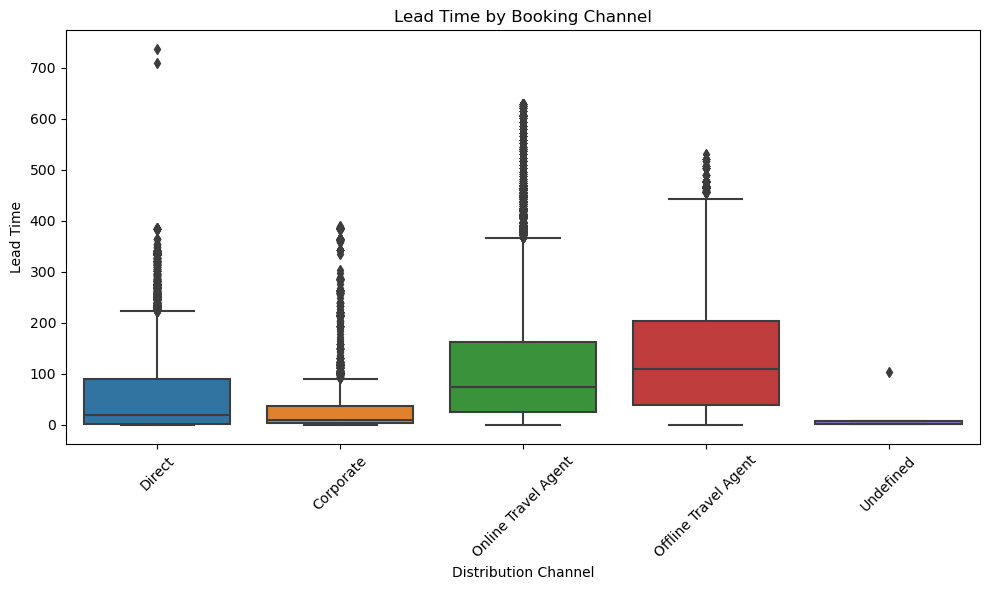

In [22]:
# Boxplot by booking channel
plt.figure(figsize=(10,6))
sns.boxplot(x='Distribution Channel', y='Lead Time', data=SHG)
plt.title('Lead Time by Booking Channel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

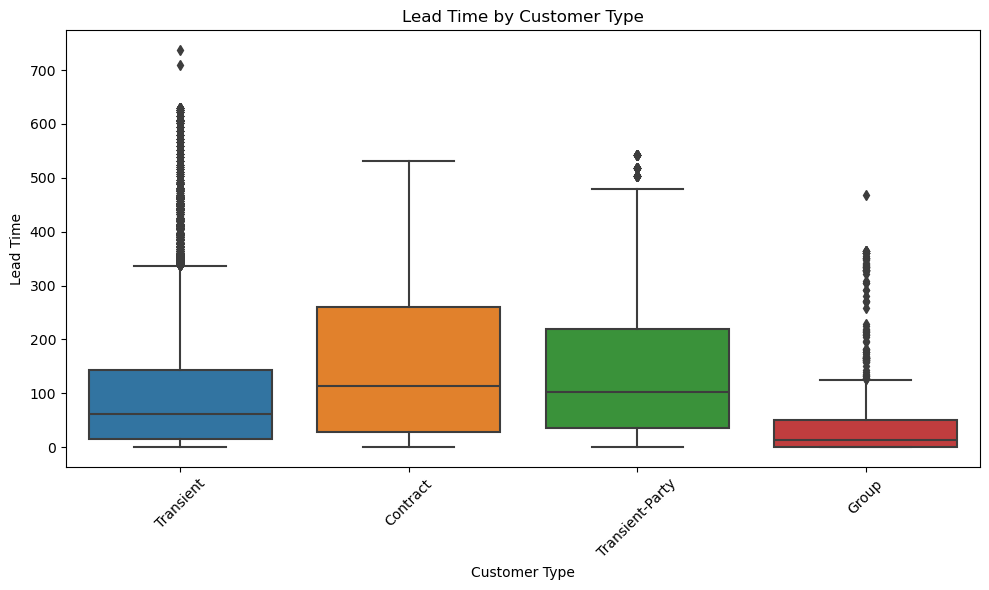

In [23]:
# Boxplot by Customer Type
plt.figure(figsize=(10,6))
sns.boxplot(x='Customer Type', y='Lead Time', data=SHG)
plt.title('Lead Time by Customer Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Correlation between Lead Time and Customer Type + Channel
grouped = SHG.groupby(['Distribution Channel', 'Customer Type'])['Lead Time'].mean().reset_index()
print(grouped.sort_values('Lead Time', ascending=False))

    Distribution Channel    Customer Type   Lead Time
8   Offline Travel Agent         Contract  160.839118
11  Offline Travel Agent  Transient-Party  159.841296
15   Online Travel Agent  Transient-Party  139.493458
12   Online Travel Agent         Contract  130.421338
10  Offline Travel Agent        Transient  119.729318
7                 Direct  Transient-Party  107.721888
16             Undefined        Transient  103.000000
14   Online Travel Agent        Transient  101.127577
3              Corporate  Transient-Party   77.855456
5                 Direct            Group   69.646552
9   Offline Travel Agent            Group   68.062500
4                 Direct         Contract   64.333333
6                 Direct        Transient   49.056025
0              Corporate         Contract   43.407407
13   Online Travel Agent            Group   42.295455
2              Corporate        Transient   25.814886
1              Corporate            Group    6.933333
17             Undefined  Tr